In [ ]:
# Task-A
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


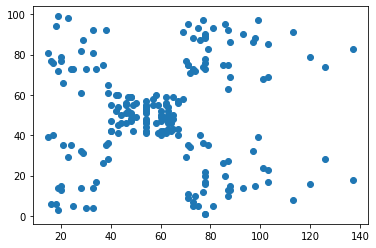

In [ ]:
x = data['Annual Income (k$)']
y = data['Spending Score (1-100)']
X = data[['Annual Income (k$)','Spending Score (1-100)']]
plt.scatter(x,y)

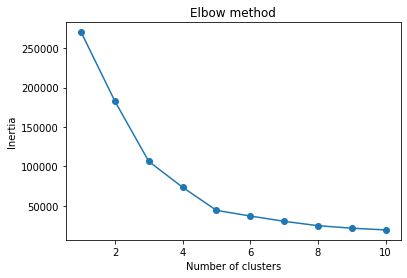

In [ ]:
data = list(zip(x, y))
inertias = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

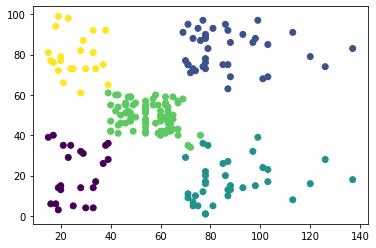

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
plt.scatter(x, y, c=kmeans.labels_)
plt.show()

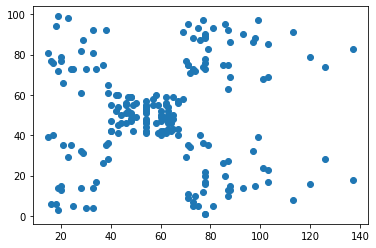

In [ ]:
# Task-B
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('Mall_Customers.csv')
data.head()
x1 = data['Annual Income (k$)']
x2 = data['Spending Score (1-100)']
plt.scatter(x1,x2)

In [ ]:
def K_Means(x1,x2):
    return ((((x1[0]-x2[0]) ** 2) + ((x1[1] - x2[1]) ** 2))**1/2)
import random
data = data[['Annual Income (k$)','Spending Score (1-100)']]
df = list(zip(data['Annual Income (k$)'],data['Spending Score (1-100)']))
Centroids = 5
Iterations = 10000
center_data =[]
center = [random.choice(df) for i in range(Centroids)]

for i in range(Iterations):
  for j in range (len(df)):
    distance = []
    for k in range (Centroids):
      dis = K_Means(df[j],center[k])
      distance.append(dis)
    center_data.append(distance.index(min(distance)))
  for j in range(Centroids):
    y = [i for i in range(len(df)) if center_data[i] == j]
    center[j] = (sum([df[i][0] for i in y])/len(y),sum([df[i][1] for i in y])/len(y))
  if i < Iterations-1:
    center_data = []

plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'],c = center_data)
plt.show()


NameError: ignored

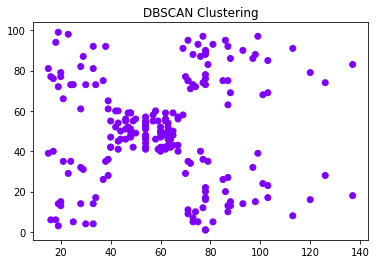

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_
plt.scatter(x, y, c=labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()